In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [67]:
file = pd.read_csv("cumulative.csv")

In [68]:
file.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [69]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
rowid                9564 non-null int64
kepid                9564 non-null int64
kepoi_name           9564 non-null object
kepler_name          2294 non-null object
koi_disposition      9564 non-null object
koi_pdisposition     9564 non-null object
koi_score            8054 non-null float64
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_period           9564 non-null float64
koi_period_err1      9110 non-null float64
koi_period_err2      9110 non-null float64
koi_time0bk          9564 non-null float64
koi_time0bk_err1     9110 non-null float64
koi_time0bk_err2     9110 non-null float64
koi_impact           9201 non-null float64
koi_impact_err1      9110 non-null float64
koi_impact_err2      9110 non-null float64
koi_duration         9564 non-null float64
koi_du

In [95]:
file.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

## **KOI DISPOSITION**

#### KOI Disposition from Literature

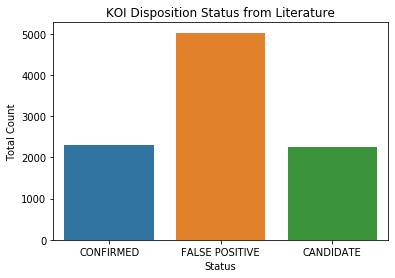

In [70]:
sns.countplot(file.koi_disposition)
plt.title("KOI Disposition Status from Literature")
plt.xlabel("Status")
plt.ylabel("Total Count")
plt.show()

#### Distribution of Candidate and False Positive Status After Kepler Analysis

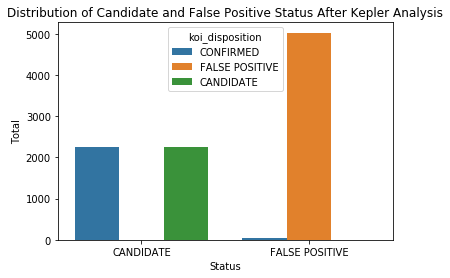

In [71]:
sns.countplot(x='koi_pdisposition', data=file, hue='koi_disposition')
plt.title("Distribution of Candidate and False Positive Status After Kepler Analysis")
plt.xlabel("Status")
plt.ylabel("Total")
plt.show()

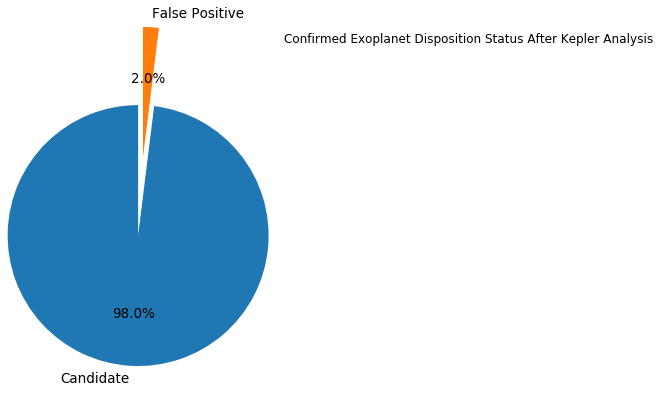

In [72]:
confirmed_planet = file[(file['koi_disposition'] == "CONFIRMED")]
Candidate_con = confirmed_planet[confirmed_planet["koi_pdisposition"] == "CANDIDATE"]
False_Positive_con = confirmed_planet[confirmed_planet["koi_pdisposition"] == "FALSE POSITIVE"]
textprops = {"fontsize":13.5}
explode = (0.9,0)

plt.pie([Candidate_con.koi_pdisposition.count(), False_Positive_con.koi_pdisposition.count()], explode = explode,
               labels=["Candidate", "False Positive"],autopct='%1.1f%%',radius = 1.5,startangle =90, textprops =textprops)

plt.title("Confirmed Exoplanet Disposition Status After Kepler Analysis", x=2)
plt.show()

#### KOI Disposition After Kepler Analysis

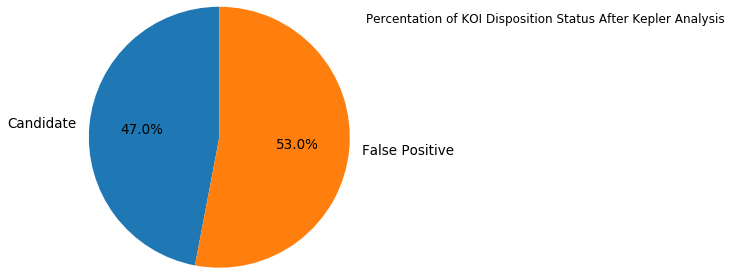

In [73]:
Candidate = file[file["koi_pdisposition"] == "CANDIDATE"]
False_Positive = file[file["koi_pdisposition"] == "FALSE POSITIVE"]

plt.pie([Candidate.koi_pdisposition.count(), False_Positive.koi_pdisposition.count()],
        labels=["Candidate", "False Positive"], autopct='%1.1f%%',radius = 1.5, startangle =90,textprops =textprops
               )
plt.title("Percentation of KOI Disposition Status After Kepler Analysis", x=2)
plt.show()

Text(0, 0.5, 'Total Count')

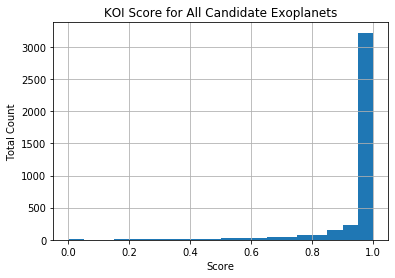

In [74]:
file.koi_score[(file['koi_pdisposition'] == "CANDIDATE")].hist(bins=20)
plt.title("KOI Score for All Candidate Exoplanets")
plt.xlabel("Score")
plt.ylabel("Total Count")

Text(0, 0.5, 'Total Count')

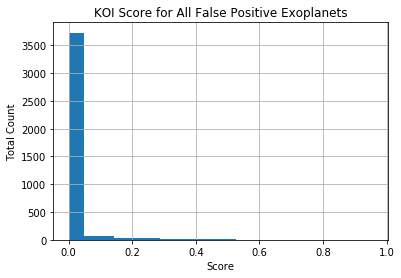

In [99]:
file.koi_score[(file['koi_pdisposition'] == "FALSE POSITIVE")].hist(bins=20)
plt.title("KOI Score for All False Positive Exoplanets")
plt.xlabel("Score")
plt.ylabel("Total Count")

## **Stellar Type**

In [76]:
conditions = [
    file['koi_steff'] < 3700,
    file['koi_steff'] < 5200,
    file['koi_steff'] < 6000,
    file['koi_steff'] < 7500,
    file['koi_steff'] < 10000,
    file['koi_steff'] < 30000,
    True
]

outputs = [
    "M", "K", "G",
    "F", "A", "B", "O"
]

file['stellar_type'] = np.select(conditions, outputs)

file.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,stellar_type
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,G
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,G
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,G
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,G
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,F


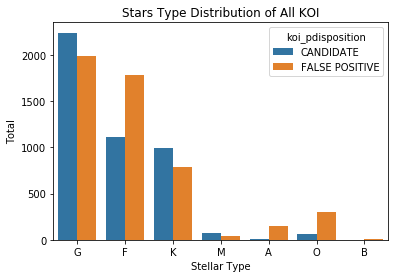

In [77]:
sns.countplot(x='stellar_type', data=file, hue='koi_pdisposition')
plt.title("Stars Type Distribution of All KOI")
plt.xlabel("Stellar Type")
plt.ylabel("Total")
plt.show()

## **Magnitude**

Text(0, 0.5, 'Total Count')

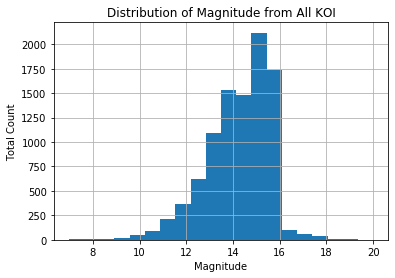

In [78]:
file['koi_kepmag'].hist(bins=20)
plt.title("Distribution of Magnitude from All KOI")
plt.xlabel("Magnitude")
plt.ylabel("Total Count")

In [79]:
candidate = file[file['koi_pdisposition'] == "CANDIDATE"]
candidate = candidate.rename(columns={"koi_kepmag": "koi_kepmag_candidate"})

false = file[file['koi_pdisposition'] == "FALSE POSITIVE"]
false = false.rename(columns={"koi_kepmag": "koi_kepmag_false"})

Text(0, 0.5, 'Total Count')

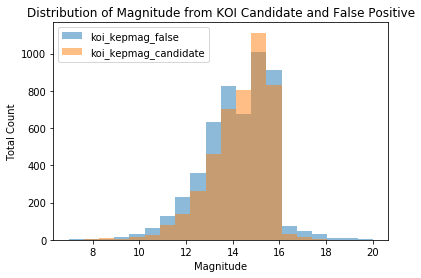

In [80]:
det = pd.concat([false['koi_kepmag_false'],candidate['koi_kepmag_candidate']], join = 'outer', axis = 1)
det.plot.hist(bins=20,alpha=0.5)
plt.title("Distribution of Magnitude from KOI Candidate and False Positive")
plt.xlabel("Magnitude")
plt.ylabel("Total Count")

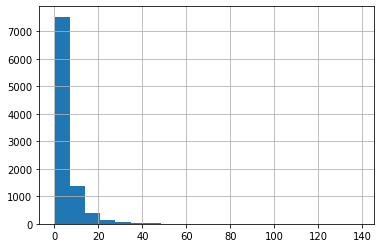

In [81]:
file['koi_duration'].hist(bins=20)

## Flag

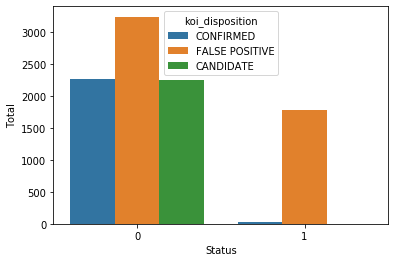

In [82]:
sns.countplot(x='koi_fpflag_nt', data=file, hue='koi_disposition')
plt.xlabel("Status")
plt.ylabel("Total")
plt.show()

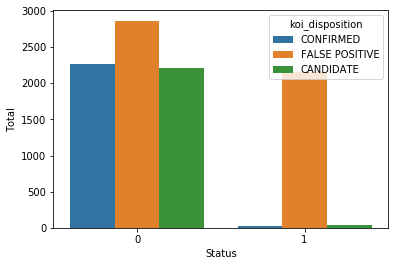

In [83]:
sns.countplot(x='koi_fpflag_ss', data=file, hue='koi_disposition')
plt.xlabel("Status")
plt.ylabel("Total")
plt.show()

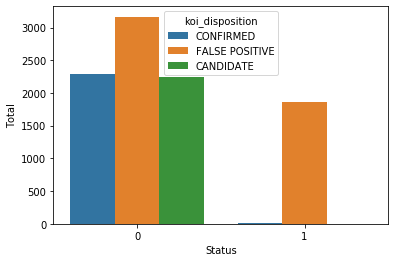

In [84]:
sns.countplot(x='koi_fpflag_co', data=file, hue='koi_disposition')
plt.xlabel("Status")
plt.ylabel("Total")
plt.show()

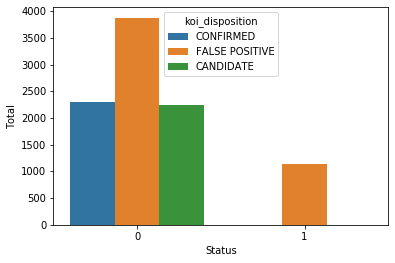

In [85]:
sns.countplot(x='koi_fpflag_ec', data=file, hue='koi_disposition')
plt.xlabel("Status")
plt.ylabel("Total")
plt.show()

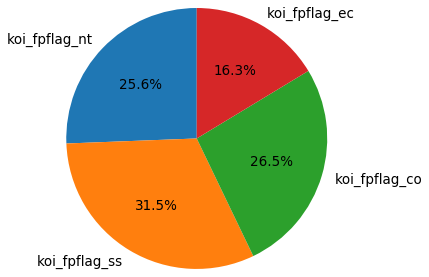

In [97]:
one = file[file['koi_fpflag_nt'] == 1]
two = file[file['koi_fpflag_ss'] == 1]
three = file[file['koi_fpflag_co'] == 1]
four = file[file['koi_fpflag_ec'] == 1]

y = np.array([one.koi_fpflag_nt.count(), two.koi_fpflag_ss.count(), three.koi_fpflag_co.count(), four.koi_fpflag_ec.count()])
mylabels = ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%',radius = 1.5, startangle =90,
         textprops =textprops)
plt.show() 


### Habitability

In [86]:
Lo = 3.83e26 

L = 5.67051e-8*4*math.pi*((candidate['koi_srad']*6.96e8) **2)*(candidate['koi_steff']**4)
candidate['Luminosity'] = L

M = (L/Lo)**(1/3.5)*1.9e30
candidate['Mass_star'] = M

dis = ((6.67408e-11*candidate['Mass_star']*((candidate['koi_period']*86400)**2)/(4*(math.pi)**2))**(1/3))/1.49e11
candidate['distance'] = dis

ri = ((candidate['Luminosity']/Lo)/1.1)**(1/2)
candidate['ri'] = ri

ro = ((candidate['Luminosity']/Lo)/0.53)**(1/2)
candidate['ro']= ro

candidate.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_srad_err2,ra,dec,koi_kepmag_candidate,stellar_type,Luminosity,Mass_star,distance,ri,ro
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-0.061,291.93423,48.141651,15.347,G,2.626570e+26,1.705889e+30,0.083676,0.789585,1.137515
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-0.061,291.93423,48.141651,15.347,G,2.626570e+26,1.705889e+30,0.268111,0.789585,1.137515
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-0.133,288.75488,48.226200,15.509,F,4.996560e+26,2.049962e+30,0.036812,1.089030,1.568911
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-0.105,296.28613,48.224670,15.714,F,4.357682e+26,1.971378e+30,0.097459,1.017026,1.465178
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-0.105,296.28613,48.224670,15.714,F,4.357682e+26,1.971378e+30,0.050470,1.017026,1.465178


In [87]:
candidate.loc[(candidate['distance']>candidate['ri']) & (candidate['distance']<candidate['ro']), 'Habitability'] = 'Habitable'
candidate.loc[(candidate['distance']<candidate['ri']), 'Habitability'] = 'Non-Habitable'
candidate.loc[(candidate['distance']>candidate['ro']), 'Habitability'] = 'Non-Habitable'

candidate.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,ra,dec,koi_kepmag_candidate,stellar_type,Luminosity,Mass_star,distance,ri,ro,Habitability
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,291.93423,48.141651,15.347,G,2.626570e+26,1.705889e+30,0.083676,0.789585,1.137515,Non-Habitable
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,291.93423,48.141651,15.347,G,2.626570e+26,1.705889e+30,0.268111,0.789585,1.137515,Non-Habitable
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,288.75488,48.226200,15.509,F,4.996560e+26,2.049962e+30,0.036812,1.089030,1.568911,Non-Habitable
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,296.28613,48.224670,15.714,F,4.357682e+26,1.971378e+30,0.097459,1.017026,1.465178,Non-Habitable
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,296.28613,48.224670,15.714,F,4.357682e+26,1.971378e+30,0.050470,1.017026,1.465178,Non-Habitable


In [88]:
candidate['Habitability'].value_counts().to_frame()

,Habitability
Non-Habitable,4335
Habitable,98


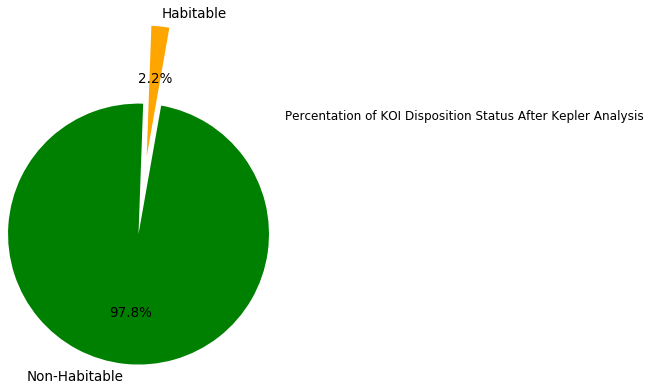

In [89]:
Habitable = candidate[candidate['Habitability'] == 'Habitable']
Non_Habitable = candidate[candidate['Habitability'] == 'Non-Habitable']

plt.pie([Habitable.Habitability.count(), Non_Habitable.Habitability.count()],
        labels=['Habitable', 'Non-Habitable'], explode = explode, autopct='%1.1f%%',radius = 1.5, startangle =80,
        colors = ["Orange","Green"], textprops =textprops
               )
plt.title("Percentation of KOI Disposition Status After Kepler Analysis", x=2)
plt.show()

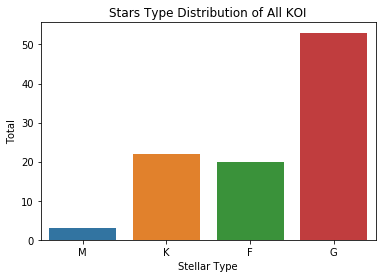

In [93]:
sns.countplot(Habitable.stellar_type)
plt.title("Stars Type Distribution of All KOI")
plt.xlabel("Stellar Type")
plt.ylabel("Total")
plt.show()

Rumus Luminotas

L = kATeff^4

Rumus Luminositas dan Massa

L/Lo = (M/Mo)^3.5

*dalam massa matahari

Hukum 3 Kepler

